In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
dataset = []
df = None

In [3]:
def set_hostnames(number_of_hosts: int):

    choices_os = ['L', 'S', 'A', 'H']
    prob_os = [40, 30, 20, 10]
    choices_env = ['D', 'I', 'T', 'S', 'P']
    prob_env = [10, 10, 25, 25, 30]
    choices_country = ['NOR', 'FRA', 'ITA', 'ESP', 'DEU', 'IRL']
    prob_country = [6, 9, 16, 16, 23, 30]

    dict_combo = {}
    complete_list = []
 
    for x in range(number_of_hosts):
    
        os = random.choices(choices_os, weights=prob_os, k=1)[0]      
        env = random.choices(choices_env, weights=prob_env, k=1)[0]  
        country = random.choices(choices_country, weights=prob_country, k=1)[0]  
    
        combo = os + env + country        
    
        dict_combo[combo] = dict_combo.get(combo, 0) + 1
    
        node = dict_combo[combo]
        node_string = f'{node:03d}'
        hostname = combo + node_string        
        
        complete_list.append(hostname)
        
    return complete_list


In [7]:
def get_os(hostname: str):
    hostname_os = hostname[0]
    if hostname_os == 'L':
        return 'Linux'
    elif hostname_os == 'S':
        return 'Solaris'
    elif hostname_os == 'A':
        return 'AIX'
    elif hostname_os == 'H':
        return 'HP-UX'
    else:
        return 'Unknown'

In [6]:
def get_environment(hostname: str):
    hostname_env = hostname[1]
    if hostname_env == 'D':
        return 'Development'
    if hostname_env == 'I':
        return 'Integration'
    elif hostname_env == 'T':
        return 'Testing'
    elif hostname_env == 'S':
        return 'Staging'
    elif hostname_env == 'P':
        return 'Production'
    else:
        return 'Unknown'

In [8]:
def get_country(hostname: str):
    
    hostname_country = hostname[2:5]
    if hostname_country == 'NOR':
        return 'Norway'
    elif hostname_country == 'DEU':
        return 'Germany'
    elif hostname_country == 'ITA':
        return 'Italy'
    elif hostname_country == 'ESP':
        return 'Spain'
    elif hostname_country == 'IRL':
        return 'Ireland'
    elif hostname_country == 'FRA':
        return 'France'
    else:
        return 'Unknown'

In [9]:
def set_dataframe(count: int):
    global df
    global dataset
    hostnames = set_hostnames(count)

    for h in hostnames:
        hostname_dict ={
                    'hostname': h, 
                    'os': get_os(h),
                    'environment': get_environment(h), 
                    'country': get_country(h), 
                    'node': int(h[-3:])
        }
        dataset.append(hostname_dict)
    df = pd.DataFrame(dataset)
    return df

In [10]:
df = set_dataframe(1500)
df

,hostname,os,environment,country,node
0,ATDEU001,AIX,Testing,Germany,1
1,LSDEU001,Linux,Staging,Germany,1
2,LDFRA001,Linux,Development,France,1
3,ASESP001,AIX,Staging,Spain,1
4,SSIRL001,Solaris,Staging,Ireland,1
...,...,...,...,...,...
1495,STITA018,Solaris,Testing,Italy,18
1496,SPITA018,Solaris,Production,Italy,18
1497,ASITA014,AIX,Staging,Italy,14
1498,SPIRL046,Solaris,Production,Ireland,46


In [11]:
df.to_csv('hosts.csv', header=True, index=False)
df_hosts = pd.read_csv('hosts.csv')
df_hosts

,hostname,os,environment,country,node
0,ATDEU001,AIX,Testing,Germany,1
1,LSDEU001,Linux,Staging,Germany,1
2,LDFRA001,Linux,Development,France,1
3,ASESP001,AIX,Staging,Spain,1
4,SSIRL001,Solaris,Staging,Ireland,1
...,...,...,...,...,...
1495,STITA018,Solaris,Testing,Italy,18
1496,SPITA018,Solaris,Production,Italy,18
1497,ASITA014,AIX,Staging,Italy,14
1498,SPIRL046,Solaris,Production,Ireland,46


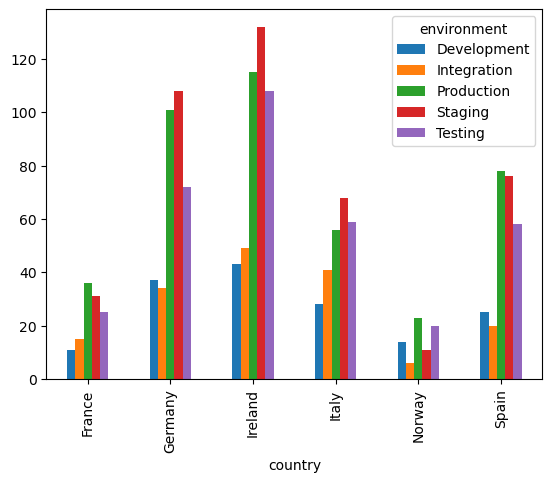

In [12]:
grafico_1 = df.groupby([df_hosts['country'], 'environment']).size().unstack()

grafico_1.plot(kind='bar');
# country_grafico = grafico['country']

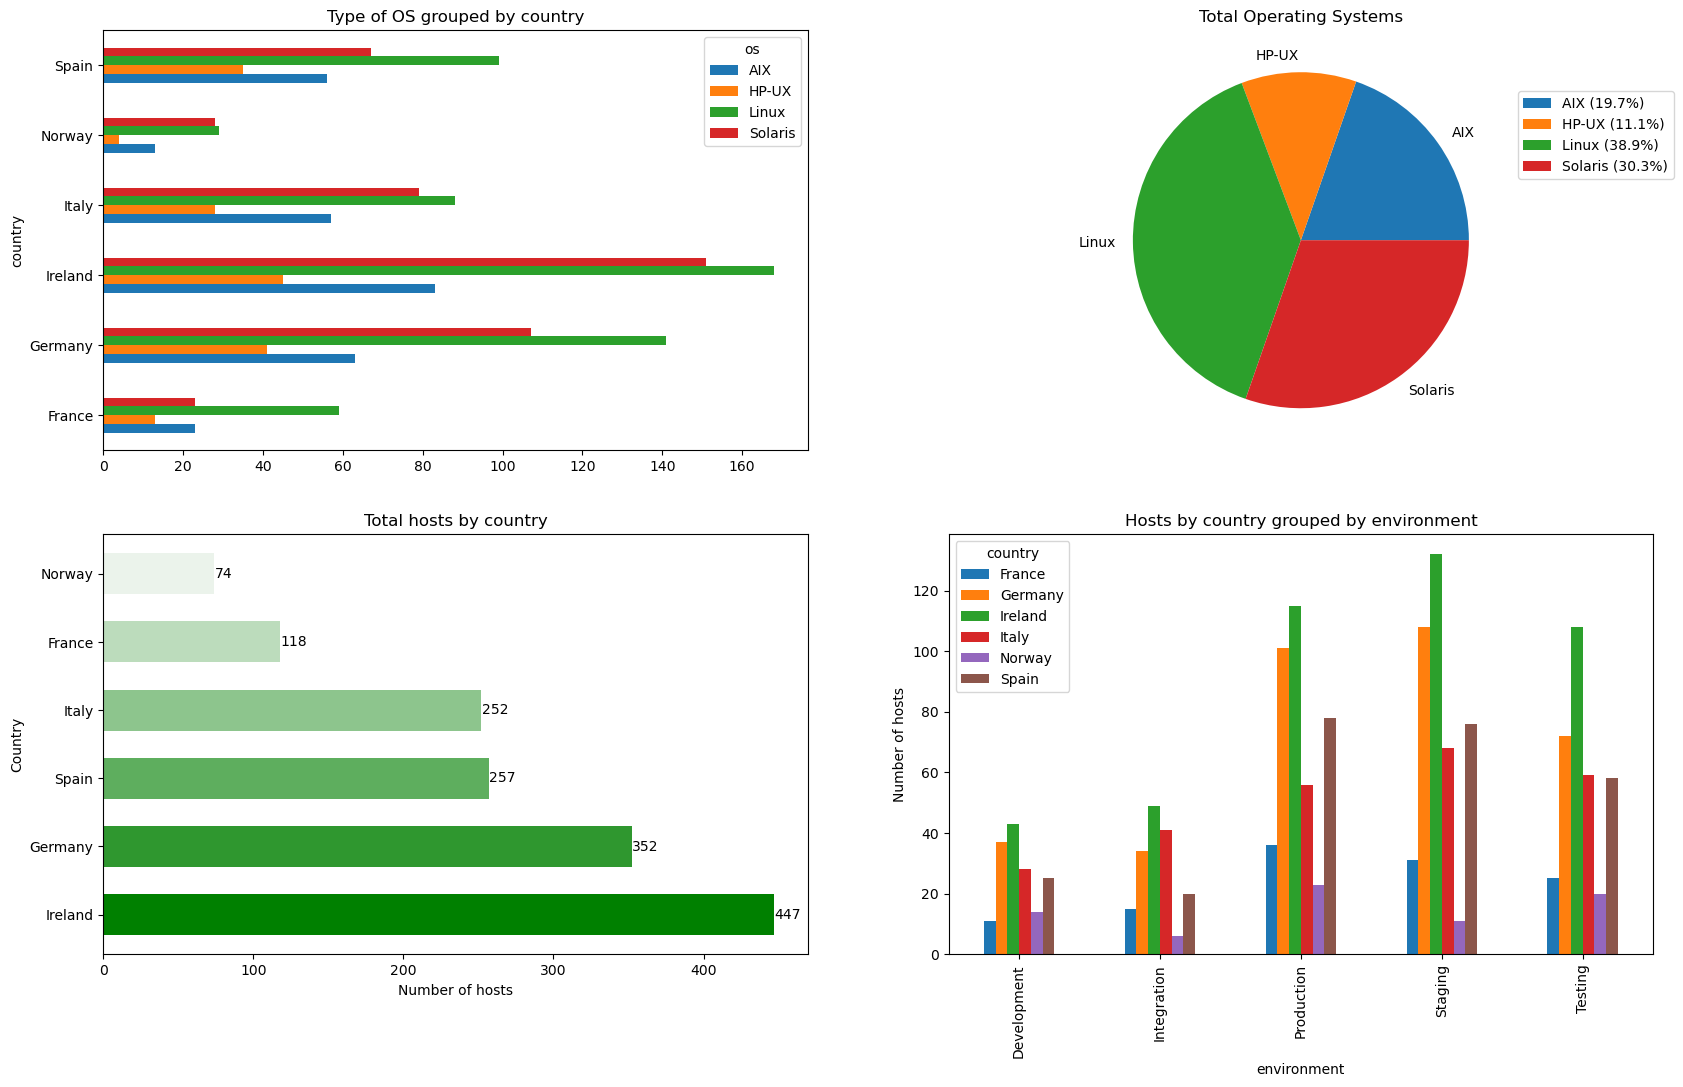

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(20,12))

#G2 - 0,0
g2 = df.groupby([df['country'], 'os']).size().unstack()
g2.plot(kind='barh', ax = axs[0,0], title ='Type of OS grouped by country' )


#G3 - 0,1
g3 = df.groupby([df['os']]).size()
g3_porcentajes = (g3 / g3.sum() * 100).round(1)
g3_leyenda = [f"{os} ({p}%)" for os, p in zip(g3.index, g3_porcentajes)]

axs[0,1].pie(
    x = g3, 
    labels = g3.index
    )

axs[0,1].legend(
    g3_leyenda, 
    loc='center left', 
    bbox_to_anchor=(1, 0.75))

axs[0,1].set_title('Total Operating Systems')


#G4 - 1,0    
g4_countries = df['country'].value_counts()
g4_seq_palette = sns.light_palette("green", len(g4_countries), reverse=True)

axs[1,0].barh(
    g4_countries.index, 
    g4_countries.values, 
    color=g4_seq_palette, 
    height=0.6)

axs[1,0].set_xlabel("Number of hosts")
axs[1,0].set_ylabel("Country")
axs[1,0].set_title('Total hosts by country')

for i, v in enumerate(g4_countries.values):
    axs[1,0].text(v + 0.2, i, str(v), va='center')

axs[1,0].tick_params(axis='y', labelsize=10)


#G5 - 1,1
g5 = df.groupby([df['country'], 'environment']).size().unstack(0)

g5.plot(kind='bar', ax= axs[1,1], title ='Hosts by country grouped by environment')

axs[1,1].set_ylabel("Number of hosts");